In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting

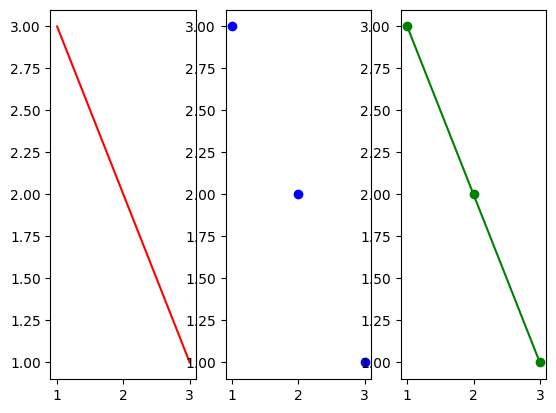

In [26]:
x = [1, 2, 3]
y = [3, 2, 1]

figure, axis = plt.subplots(1, 3)

axis[0].plot(x, y, color='r')
axis[1].scatter(x, y, color='b')
axis[2].plot(x, y, color='g')
axis[2].scatter(x, y, color='g')

plt.show()

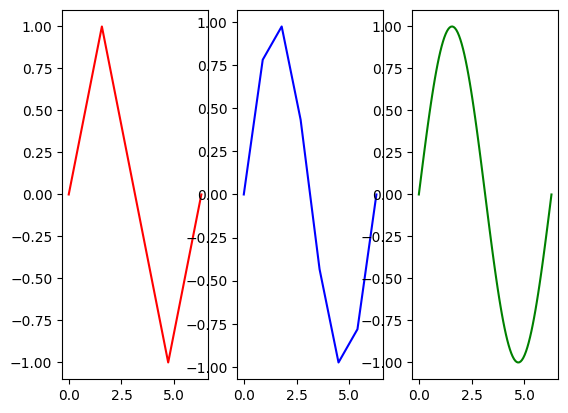

In [41]:
x1 = np.linspace(0, 2*np.pi, 5)
x2 = np.linspace(0, 2*np.pi, 8)
x3 = np.linspace(0, 2*np.pi, 100)
y1 = [np.sin(i) for i in x1]
y2 = [np.sin(i) for i in x2]
y3 = [np.sin(i) for i in x3]

figure, axis = plt.subplots(1, 3)

axis[0].plot(x1, y1, color='r')
axis[1].plot(x2, y2, color='b')
axis[2].plot(x3, y3, color='g')

plt.show()

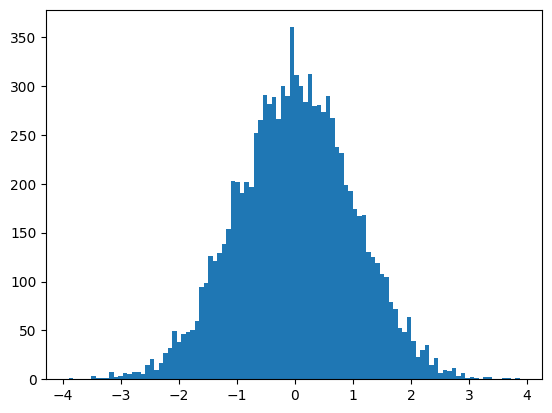

In [43]:
x = np.random.randn(10000)

plt.hist(x, bins=100)
plt.show()

In [48]:
print(x[x < -3], '\n')
print(x[x < -3].size)

[-3.02940176 -3.47120958 -3.47636335 -3.19637093 -3.14823477 -3.47280907
 -3.02738525 -3.11003049 -3.27615917 -3.4321906  -3.17781153 -3.89899625
 -3.17881753 -3.18269502 -3.28945282 -3.19339572 -3.14795406 -3.04724051] 

18


# Pandas
## Dataframes

In [51]:
df = pd.DataFrame({'name': ['Ali', 'Mina'], 'age': [25, 22]})
df

,name,age
0,Ali,25
1,Mina,22


### read dataframes from the given path
```
path = ''
df = pd.read_csv(path)
```

### column names
```
df.columns
```

In [58]:
df.columns

Index(['name', 'age'], dtype='object')

### getting informations of a dataframe
```
df.info()
```

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2 non-null      object
 1   age     2 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 164.0+ bytes


### statistics analysis of a dataframe
```
df.describe()               # only includes numeric columns
df.describe(include='all')  # includes all columns, including strings
```

In [62]:
df.describe()

,age
count,2.00000
mean,23.50000
std,2.12132
min,22.00000
25%,22.75000
50%,23.50000
75%,24.25000
max,25.00000


In [63]:
df.describe(include='all')

,name,age
count,2,2.00000
unique,2,NaN
top,Ali,NaN
freq,1,NaN
mean,NaN,23.50000
std,NaN,2.12132
min,NaN,22.00000
25%,NaN,22.75000
50%,NaN,23.50000
75%,NaN,24.25000


### slicing dataframes
```
df[df.column_name > value]
```

In [64]:
df[df.age > 22]

,name,age
0,Ali,25


### datafram head & tail
```
df.head(5)
df.tail(5)
```

# clustering
## k-means

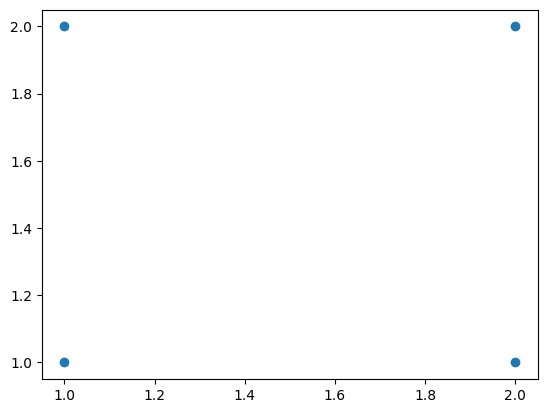

In [67]:
df = pd.DataFrame({'x':[1, 2, 1, 2], 'y':[1, 1, 2, 2]})

plt.scatter(df.x, df.y)
plt.show()

In [78]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [79]:
k_means = KMeans(n_clusters=2)
k_means.fit(df)

KMeans(n_clusters=2)

In [83]:
print('labels:', k_means.labels_)
print('inertia:', k_means.inertia_)

labels: [1 0 1 0]
inertia: 1.0


### K-means limitations
* Setting a value for k
* Numeric variables only
* Sensetive to initial conditions
* Data has no noises or outliers
* Data has symmertric distribution of variables
* Good in spherical-like shapes
* Variables in the same scale
* There is no collinearity

### Evaluation metrics & Elbow method
** Inertia **
$$ Inertia = \sum_{j=1}^k \sum_{i=1}^n ||x_i^\left(j\right) - c_j||^2 $$
$$ k = \text{number of clusters} $$
$$ n = \text{number of cases} $$
$$ c = \text{centroid for cluster j} $$
$$ x = \text{case i of cluster j} $$
$$ ||\text{formula}|| = distance function $$
<br>

<div style="text-align: center">
    <img src="https://media.licdn.com/dms/image/D4D12AQF-yYtbzPvNFg/article-cover_image-shrink_720_1280/0/1682277078758?e=1697673600&v=beta&t=-U7aWnM4lGUdjAQPhcNzlybSsKEF6H7f2-FymLPhER4">
</div>

k = 1
labels = [0 0 0 0]
inercia = 2.0
------------
k = 2
labels = [1 0 1 0]
inercia = 1.0
------------
k = 3
labels = [0 0 1 2]
inercia = 0.5
------------
k = 4
labels = [1 2 3 0]
inercia = 0.0
------------


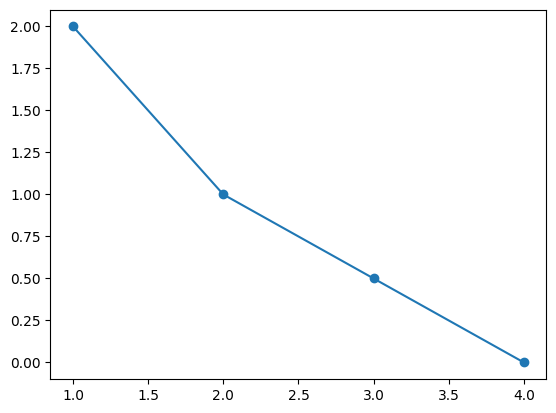

In [93]:
x = []
y = []
for k in range(1, 5):
    k_means = KMeans(n_clusters=k)
    k_means.fit(df)
    
    print('k =', k)
    print('labels =', k_means.labels_)
    print('inercia =', k_means.inertia_)
    print('------------')

    x.append(k)
    y.append(k_means.inertia_)

plt.scatter(x, y)
plt.plot(x, y)
plt.show()

## Outliers & Noise

**Outlier** <br>
A data point that deviates significantly from the majority of other data points in a dataset.

**noise** <br>
Refers to random or irrelevant variations present in data that can obscure meaningful patterns or relationships.
<br>

<div style="text-align: center">
    <img src="https://www.researchgate.net/profile/Shahla-Asadi/publication/339483610/figure/fig1/AS:862802700947464@1582719602359/Example-of-single-and-batch-outliers-in-sensory-data.png"/>
</div>

### Outlier Detection Methods
* IQR (Interquaritile Range)
* Z-score
* LOF (Local Outlier Factor)
* Isolation Forest
* DBSCAN
* etc.